29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 77s 3us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - loss: 0.3427 - val_loss: 0.2818
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.2779 - val_loss: 0.2761
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - loss: 0.2729 - val_loss: 0.2720
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - loss: 0.2689 - val_loss: 0.2701
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - loss: 0.2669 - val_loss: 0.2677
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - loss: 0.2653 - val_loss: 0.2669
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - loss: 0.2649 - val_loss: 0.2660
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.2631 - val_loss: 0.2657
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.2631 - val_loss: 0.2649
Epoch 10/10
469/46

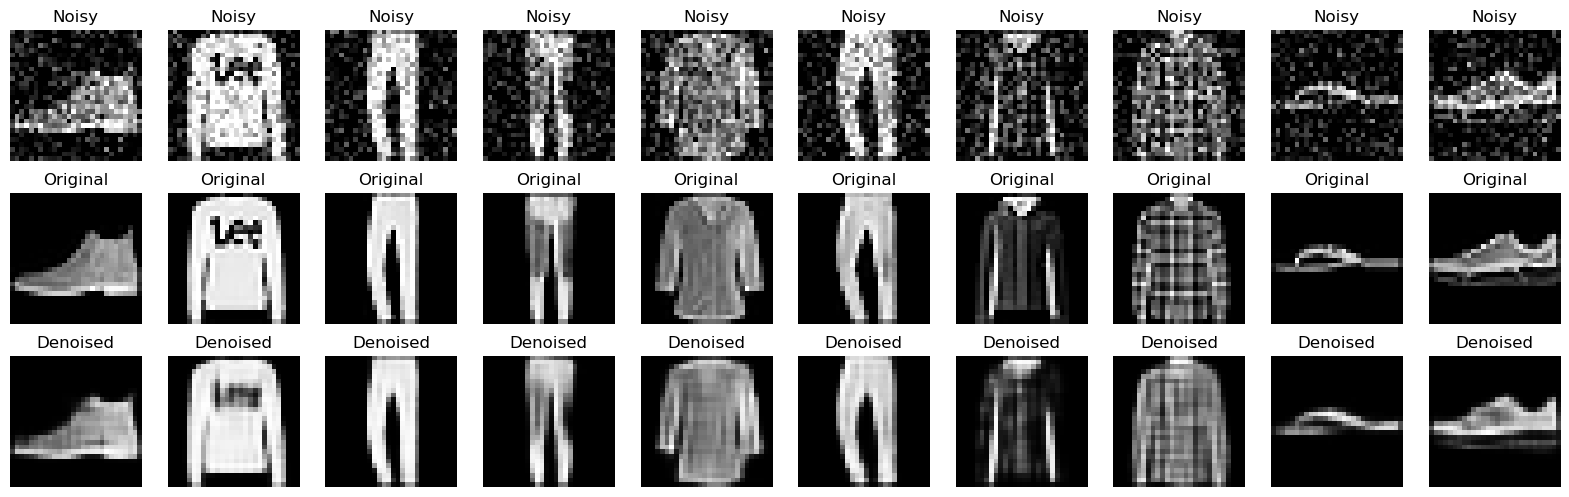

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a channel dimension to make it compatible with the model (28x28 -> 28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Add Gaussian noise
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Build the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Evaluate the autoencoder
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize results
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Display clean (original) image
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()
